In [4]:
# imports
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import imageio

In [5]:
# Upload the data 
df = pd.read_csv('Downloads/Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States_20240518.csv')
display(df)

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,1999,1,All ages,1.10,6.1,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,2000,2,All ages,1.10,6.2,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,2001,3,All ages,1.10,6.8,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,2002,4,All ages,1.10,8.2,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,2003,5,All ages,1.10,8.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 45-54 years,3.25,2018,20,45-54 years,1.60,3.4,NaN
6224,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 55-64 years,3.26,2018,20,55-64 years,1.70,2.3,NaN
6225,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 65-74 years,3.27,2018,20,65-74 years,1.80,0.4,NaN
6226,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 75-84 years,3.28,2018,20,75-84 years,1.90,NaN,*


In [6]:
# clean the dataset 

# replace columns with asteriks (indicating supressed data for confidentiality due to very small number of deaths) in the cleaned dataset with 0  
df_estimate = df.fillna({'ESTIMATE': 0})

# filter drug type ("PANEL" column) to only include opioids ... aka "drug overdose deaths involving any opioid"
# print(df["PANEL"].value_counts()) # used to see the possible options within this column   
dfFilter = df_estimate[df_estimate["PANEL"] == "Drug overdose deaths involving any opioid"]

# filter to ensure dataset is broken down by ages 
dfFilterAge = dfFilter[dfFilter["STUB_NAME"] == "Age"]

# filter to include age-adjusted rates as we are comparing across populations 
# dfFilterAgeAdjust = dfFilterAge[dfFilterAge["UNIT"] == "Deaths per 100,000 resident population, age-adjusted"]

# make each age group into its own column for easier analysis 
# we will have years as the index 
# death rate will be the values 
pivot_df = dfFilterAge.pivot_table(values='ESTIMATE', index='YEAR', columns='AGE', fill_value=0)

display(pivot_df)

AGE,15-24 years,25-34 years,35-44 years,45-54 years,55-64 years,65-74 years,75-84 years,85 years and over,Under 15 years
YEAR,,,,,,,,,
1999,1.6,4.1,7.2,5.4,1.5,0.5,0.4,0.0,0.0
2000,1.9,4.1,7.3,5.8,1.6,0.5,0.3,0.0,0.1
2001,2.3,4.4,7.8,6.6,2.0,0.5,0.4,0.5,0.1
2002,2.9,5.6,9.5,8.4,2.4,0.8,0.5,0.8,0.1
2003,3.4,6.2,9.6,9.2,2.9,0.9,0.5,0.7,0.1
2004,3.8,6.6,9.7,9.6,3.4,1.0,0.6,0.6,0.1
2005,4.0,7.4,9.6,10.7,3.9,1.2,0.7,1.0,0.1
2006,4.9,9.0,10.8,12.2,4.8,1.2,0.8,0.8,0.1
2007,5.0,9.6,11.0,12.5,5.6,1.4,0.7,1.1,0.1


<Figure size 1200x800 with 0 Axes>

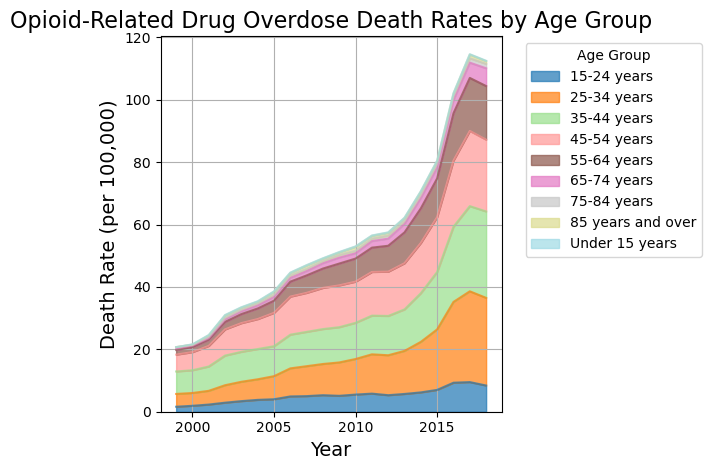

In [7]:
# A). VISUALIZE AGE 

# Plot the stacked area chart for age groups over time 
plt.figure(figsize=(12, 8))
# make a stacked area chart 
pivot_df.plot(kind='area', stacked=True, cmap='tab20', alpha=0.7)

# set titles and labels 
plt.title('Opioid-Related Drug Overdose Death Rates by Age Group', fontsize=16)
plt.xlabel('Year', fontsize=14) # x axis is year  
plt.ylabel('Death Rate (per 100,000)', fontsize=14) # y axis is death rate per 100,000 
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left') # legend is age group 
plt.grid(True) # set grid 
plt.tight_layout()
plt.show()

In [8]:
# make a bar chart gif to visualize how overdose death rates vary for each age group over time, 
# but in an easier to see way 

# ordering age groups chronologically for ease of appearance 
age_order = ['Under 15 years', '15-24 years', '25-34 years', '35-44 years', '45-54 years', '55-64 years', '65-74 years', '75-84 years', '85 years and over']
pivot_df = pivot_df[age_order]

# set directory to save the images
output_dir = 'plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Generate and save individual horizontal bar plots for each year in the dataset 
years = pivot_df.index.unique() # make sure we're only going through unique years 
for year in years:
    plt.figure(figsize=(15, 10)) 
    
    # Filter data for that specific year 
    yearly_data = pivot_df.loc[year]
    
    # Create horizontal bar chart 
    # we don't want it to be stacked 
    # skyblue to fit in with presentation theme 
    ax = yearly_data.plot(kind='barh', stacked=False, color='skyblue', alpha=0.9)
    
    # Add numeric labels to each bar to make it easier to compare across graphs 
    for index, value in enumerate(yearly_data):
        ax.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12)
    
    # Set titles and labels for each graph 
    plt.title(f'Opioid-Related Drug Overdose Death Rates by Age Group: {year}', fontsize=20)
    plt.xlabel('Death Rate (per 100,000)', fontsize=18)
    plt.ylabel('Age Group', fontsize=18)
    plt.grid(True)
    plt.tight_layout()
    
    # Save the plot as an image to use for our gif 
    plt.savefig(f'{output_dir}/plot_{year}.png')
    plt.close()

# Generate the GIF from all the images 
images = []
for year in years:
    images.append(imageio.imread(f'{output_dir}/plot_{year}.png'))
imageio.mimsave('opioid_death_rates_by_age.gif', images, duration=3, loop=0)  # 3 second per frame
# loop makes it so that gif repeats itself 
# use imageio package to make the gif 


/var/folders/jt/m6jzkl994tv08jxplywgqql40000gn/T/ipykernel_14373/991500852.py:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'{output_dir}/plot_{year}.png'))


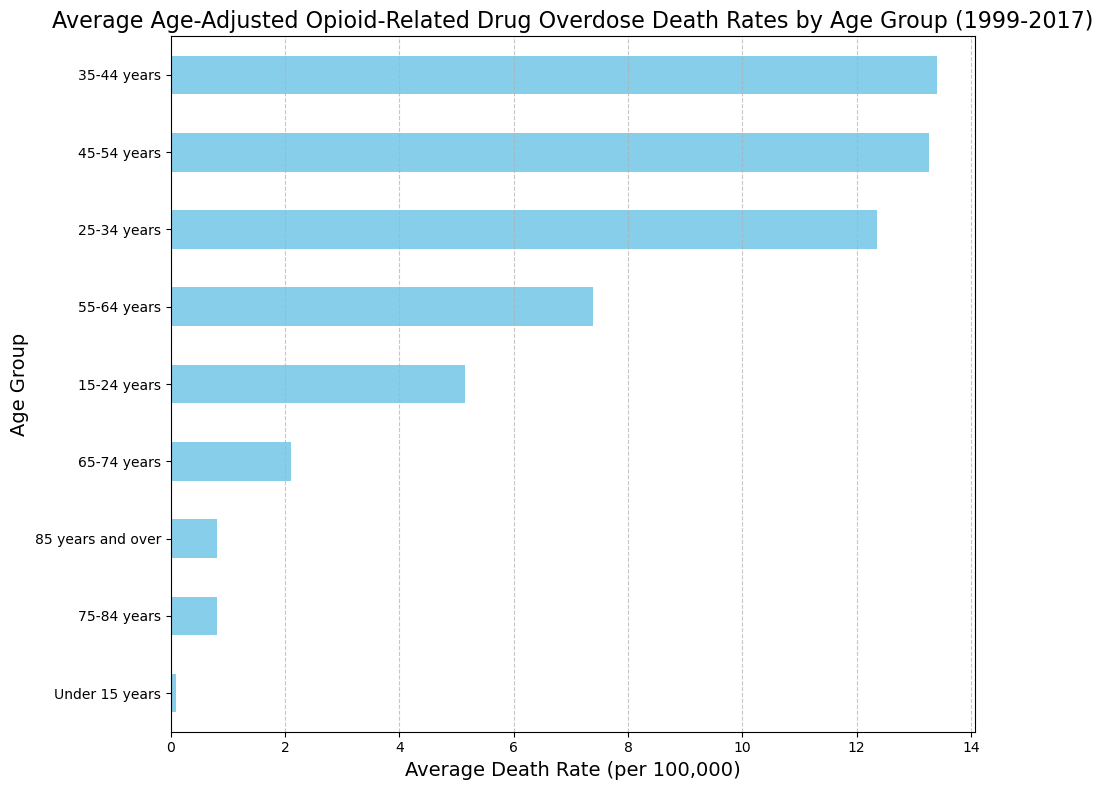

In [5]:
# Calculate the average death rate for each age group across all years
# average values will give us a clear takeaway at a glance, even though it does obscure trends over time 
average_death_rates = dfFilterAge.groupby('AGE')['ESTIMATE'].mean().sort_values()

# Plot the horizontal bar chart
plt.figure(figsize=(10, 8))
average_death_rates.plot(kind='barh', color='skyblue')
plt.title('Average Age-Adjusted Opioid-Related Drug Overdose Death Rates by Age Group (1999-2017)', fontsize=16)
plt.xlabel('Average Death Rate (per 100,000)', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


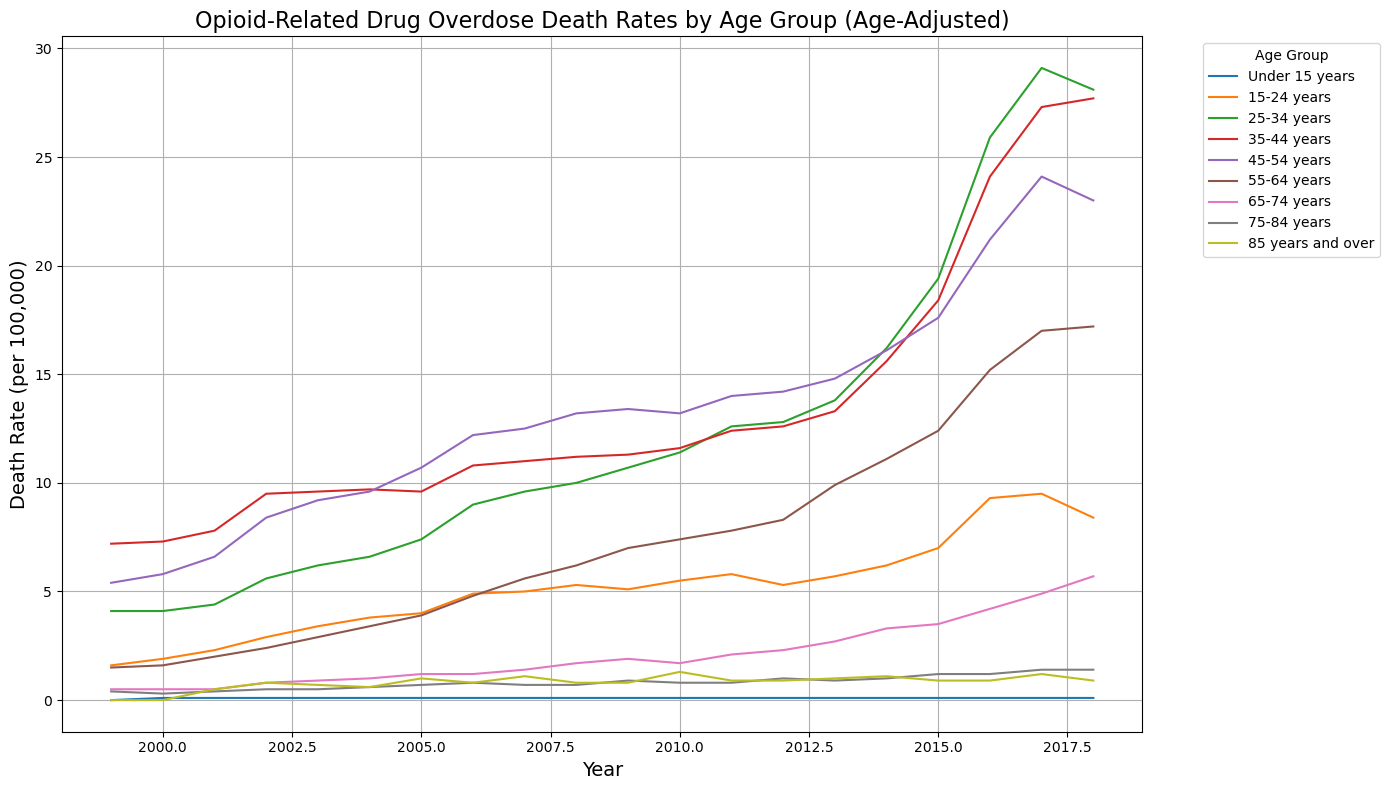

In [10]:
# plot line graph to show trends in age groups over time ... perhaps better than bar chart or stacked area chart 
plt.figure(figsize=(14, 8))
for age_group in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[age_group], label=age_group)
plt.title('Opioid-Related Drug Overdose Death Rates by Age Group (Age-Adjusted)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Death Rate (per 100,000)', fontsize=14)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# B). visualize RACE

# filter to ensure dataset is broken down by ages 
dfFilterRace = dfFilter[dfFilter["STUB_NAME"] == "Sex and race"]

# filter to include age-adjusted rates as we are comparing across populations 
# dfFilterAgeAdjust = dfFilterAge[dfFilterAge["UNIT"] == "Deaths per 100,000 resident population, age-adjusted"]
display(dfFilterRace)

# make each age group into its own column for easier analysis 
# we will have years as the index 
# death rate will be the values 
pivot_df2 = dfFilterRace.pivot_table(values='ESTIMATE', index='YEAR', columns='STUB_LABEL', fill_value=0)

display(pivot_df)

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
1044,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.1,1999,1,All ages,1.1,4.4,NaN
1045,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.1,2000,2,All ages,1.1,4.5,NaN
1046,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.1,2001,3,All ages,1.1,5.0,NaN
1047,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.1,2002,4,All ages,1.1,6.1,NaN
1048,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.1,2003,5,All ages,1.1,6.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Asian or Pacific Islander,4.8,2014,16,All ages,1.1,0.6,NaN
1200,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Asian or Pacific Islander,4.8,2015,17,All ages,1.1,0.5,NaN
1201,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Asian or Pacific Islander,4.8,2016,18,All ages,1.1,0.8,NaN
1202,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Asian or Pacific Islander,4.8,2017,19,All ages,1.1,0.9,NaN


AGE,Under 15 years,15-24 years,25-34 years,35-44 years,45-54 years,55-64 years,65-74 years,75-84 years,85 years and over
YEAR,,,,,,,,,
1999,0.0,1.6,4.1,7.2,5.4,1.5,0.5,0.4,0.0
2000,0.1,1.9,4.1,7.3,5.8,1.6,0.5,0.3,0.0
2001,0.1,2.3,4.4,7.8,6.6,2.0,0.5,0.4,0.5
2002,0.1,2.9,5.6,9.5,8.4,2.4,0.8,0.5,0.8
2003,0.1,3.4,6.2,9.6,9.2,2.9,0.9,0.5,0.7
2004,0.1,3.8,6.6,9.7,9.6,3.4,1.0,0.6,0.6
2005,0.1,4.0,7.4,9.6,10.7,3.9,1.2,0.7,1.0
2006,0.1,4.9,9.0,10.8,12.2,4.8,1.2,0.8,0.8
2007,0.1,5.0,9.6,11.0,12.5,5.6,1.4,0.7,1.1


/var/folders/jt/m6jzkl994tv08jxplywgqql40000gn/T/ipykernel_14373/49843916.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

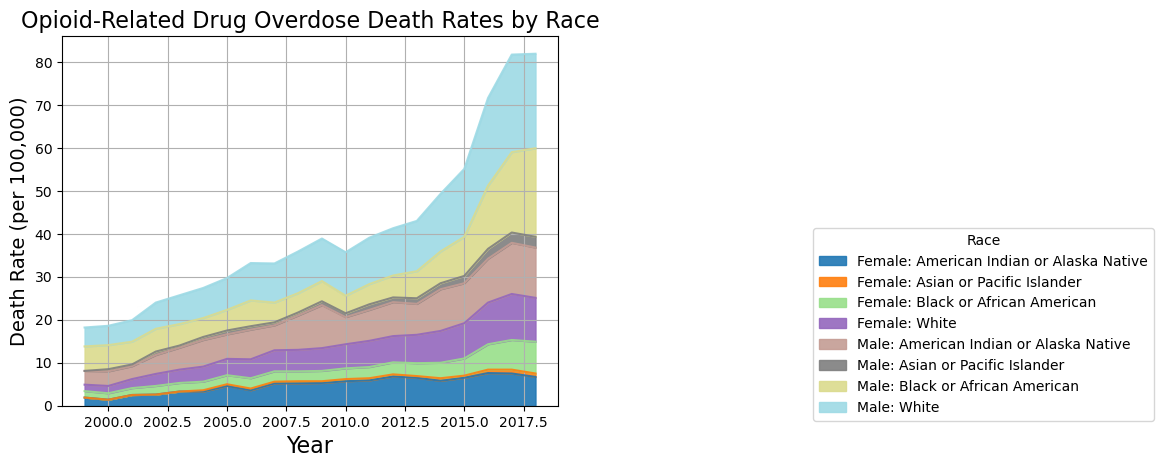

In [15]:
# Plot the stacked area chart for race
# note that this is not separated by gender 

plt.figure(figsize=(14, 8))
# make a stacked area chart 
pivot_df2.plot(kind='area', stacked=True, cmap='tab20', alpha=0.9)

# set titles and labels 
plt.title('Opioid-Related Drug Overdose Death Rates by Race', fontsize=16)
plt.xlabel('Year', fontsize=16) # x axis is year  
plt.ylabel('Death Rate (per 100,000)', fontsize=14) # y axis is death rate per 100,000 
plt.legend(title='Race', bbox_to_anchor=(1.5, 0.5), loc='upper left') # legend is age group 
plt.grid(True) # set grid 
plt.tight_layout()
plt.show()

,American Indian or Alaska Native,Asian or Pacific Islander,Black or African American,White
YEAR,,,,
1999,3.2,0.0,5.7,4.4
2000,3.4,0.5,5.6,4.5
2001,3.0,0.4,5.3,5.0
2002,4.4,0.8,5.3,6.1
2003,5.1,0.5,5.0,6.7
2004,6.2,0.7,4.4,7.0
2005,5.7,0.9,4.8,7.4
2006,6.9,0.8,6.0,8.7
2007,5.8,0.7,4.6,9.1


<Figure size 1500x1000 with 0 Axes>

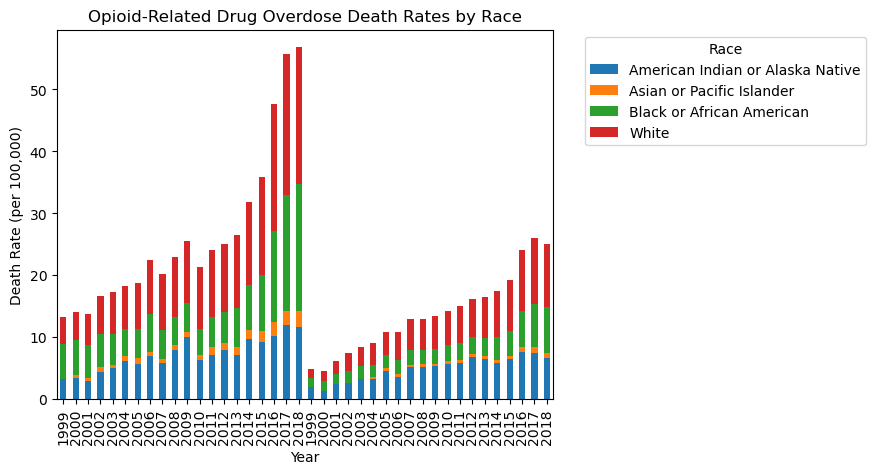

In [16]:
# Separate the data for males and females
# this will help us to combine male and female data for each racial group to focus on race, not gender 

# make copies of the dataframe for just males and just females 
male_data = pivot_df2[[col for col in pivot_df2.columns if 'Male' in col]].copy()
female_data = pivot_df2[[col for col in pivot_df2.columns if 'Female' in col]].copy()

# Rename the columns to reflect the races without gender distinction
male_data.columns = [col.split(': ')[-1] for col in male_data.columns]
female_data.columns = [col.split(': ')[-1] for col in female_data.columns]

# Combine the male and female datasets
combined_data = pd.concat([male_data, female_data])

# Display the combined data
display(combined_data)

# Plot the combined data as a stacked bar chart 
plt.figure(figsize=(15, 10))
combined_data.plot(kind='bar', stacked=True)
plt.title('Opioid-Related Drug Overdose Death Rates by Race')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000)')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/var/folders/jt/m6jzkl994tv08jxplywgqql40000gn/T/ipykernel_14373/3095918032.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 2000x2000 with 0 Axes>

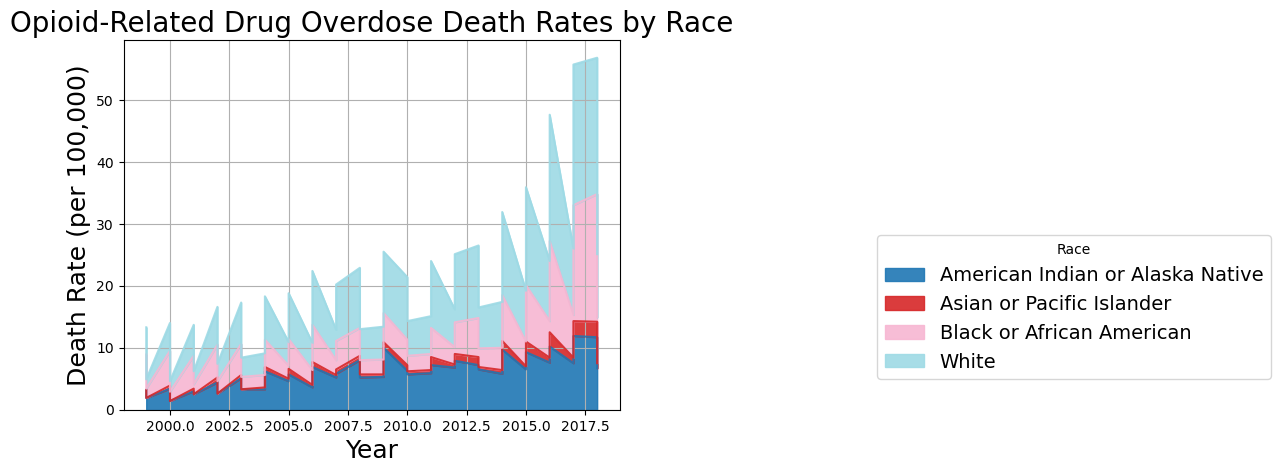

In [17]:
# make stacked area chart instead 

# Sort combined data by index 
combined_data.sort_index(inplace=True)

# Plotting the stacked area chart
plt.figure(figsize=(20, 20))  # Adjusted the figure size for better clarity
combined_data.plot(kind='area', stacked=True, cmap='tab20', alpha=0.9)

# Set titles and labels
plt.title('Opioid-Related Drug Overdose Death Rates by Race', fontsize=20)  # Increased font size for visibility 
plt.xlabel('Year', fontsize=18)  # x axis is year, increased font size for visibility 
plt.ylabel('Death Rate (per 100,000)', fontsize=18)  # y axis is death rate per 100,000, increased font size for visibility 
plt.legend(title='Race', bbox_to_anchor=(1.5, 0.5), loc='upper left', fontsize=14)  # Increased legend font size for visibility 
plt.grid(True)  # Set grid
plt.tight_layout()
plt.show()


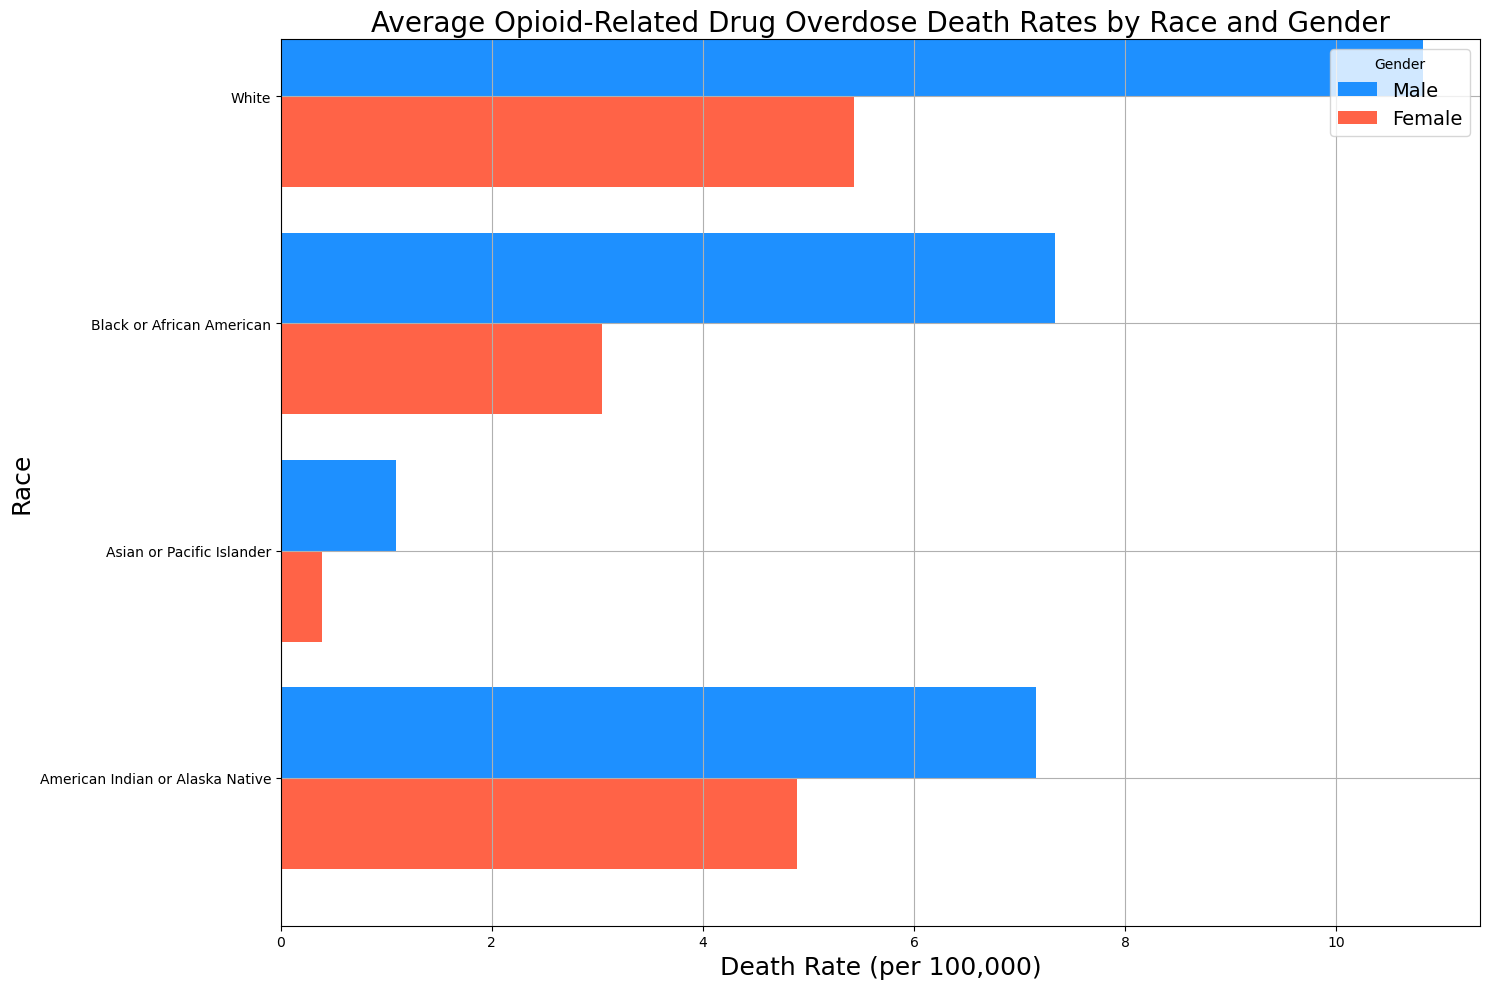

In [18]:
# make one bar chart showing average data for men and women by race 
# helps us to see if gender plays a role 

# Separate the data for males and females
male_data = pivot_df2[[col for col in pivot_df2.columns if 'Male' in col]]
female_data = pivot_df2[[col for col in pivot_df2.columns if 'Female' in col]]

# Calculate the average death rate for each race across all years for males and females separately
average_male_data = male_data.mean()
average_female_data = female_data.mean()

# Rename the columns to reflect the races without gender distinction
average_male_data.index = [col.split(': ')[-1] for col in average_male_data.index]
average_female_data.index = [col.split(': ')[-1] for col in average_female_data.index]

# df contains averages for easier plotting 
average_combined_data = pd.DataFrame({
    'Male': average_male_data,
    'Female': average_female_data
})

# Define color shades for each race
male_colors = ['#1E90FF']  # Shades of blue for men 
female_colors = ['#FF6347']  # Shades of red for women 

# # Ensure that colors align with the number of races
# no longer relevant because let's just use one shade 
# male_colors = male_colors[:len(average_male_data)]
# female_colors = female_colors[:len(average_female_data)]

# Plotting the average death rates as a horizontal bar chart
fig, ax = plt.subplots(figsize=(15, 10))

# Plot male data
average_combined_data['Male'].plot(kind='barh', ax=ax, color=male_colors, label='Male', position=0, width=0.4)

# Plot female data
average_combined_data['Female'].plot(kind='barh', ax=ax, color=female_colors, label='Female', position=1, width=0.4)

# Set titles and labels
# make sure legend displays male and female data 
plt.title('Average Opioid-Related Drug Overdose Death Rates by Race and Gender', fontsize=20)
plt.xlabel('Death Rate (per 100,000)', fontsize=18)
plt.ylabel('Race', fontsize=18)
plt.legend(['Male', 'Female'], title='Gender', loc='upper right', fontsize=14)
plt.grid(True)
plt.tight_layout()

# Save the plot as an image for easy export 
plt.savefig('average_opioid_death_rates_by_race_gender.png')
plt.show()


In [37]:
# make gif of race data over time 

# Directory to save the images
output_dir = 'plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Separate the data for males and females
male_data = pivot_df2[[col for col in pivot_df2.columns if 'Male' in col]].copy()
female_data = pivot_df2[[col for col in pivot_df2.columns if 'Female' in col]].copy()

# Rename the columns to reflect the races without gender distinction
male_data.columns = [col.split(': ')[-1] for col in male_data.columns]
female_data.columns = [col.split(': ')[-1] for col in female_data.columns]

# Combine the male and female datasets
combined_data = pd.concat([male_data, female_data])

# Aggregate the data for each year
aggregated_data = combined_data.groupby(combined_data.index).sum()

# Define a consistent color map for the races
# color codes match presentation template
# for easier readability of graph 
color_map = {
    'American Indian or Alaska Native': '#2d4358',
    'Asian or Pacific Islander': '#ebf5fd',
    'Black or African American': '#5393e9',
    'Hispanic or Latino': '#74b3f1',
    'White': '#96c8f5',
    'Other': '#b3dbf0'
}

# Generate and save individual plots for each year
years = aggregated_data.index.unique()
for year in years:
    plt.figure(figsize=(15, 10))  
    
    # Filter data for specific year
    yearly_data = aggregated_data.loc[year]
    
    # Create horizontal bar chart with consistent colors
    ax = yearly_data.plot(kind='barh', color=[color_map.get(race, '#333333') for race in yearly_data.index], alpha=0.9)
    
    # Add numeric labels to each bar for easy viewing 
    for index, value in enumerate(yearly_data):
        ax.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12)
    
    # Set titles and labels
    plt.title(f'Opioid-Related Drug Overdose Death Rates by Race: {year}', fontsize=20)
    plt.xlabel('Death Rate (per 100,000)', fontsize=18)
    plt.ylabel('Race', fontsize=18)
    plt.grid(True)
    plt.tight_layout()
    
    # Save the plot as an image
    plt.savefig(f'{output_dir}/plot_{year}.png')
    plt.close()

# Generate the GIF
images = []
for year in years:
    images.append(imageio.imread(f'{output_dir}/plot_{year}.png'))
imageio.mimsave('opioid_death_rates_by_race5.gif', images, duration=3, loop=0)  #3 second per frame
# note that the loop = 0 is utilized to make the gif continue running 

/var/folders/jt/m6jzkl994tv08jxplywgqql40000gn/T/ipykernel_6353/3238277121.py:64: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'{output_dir}/plot_{year}.png'))


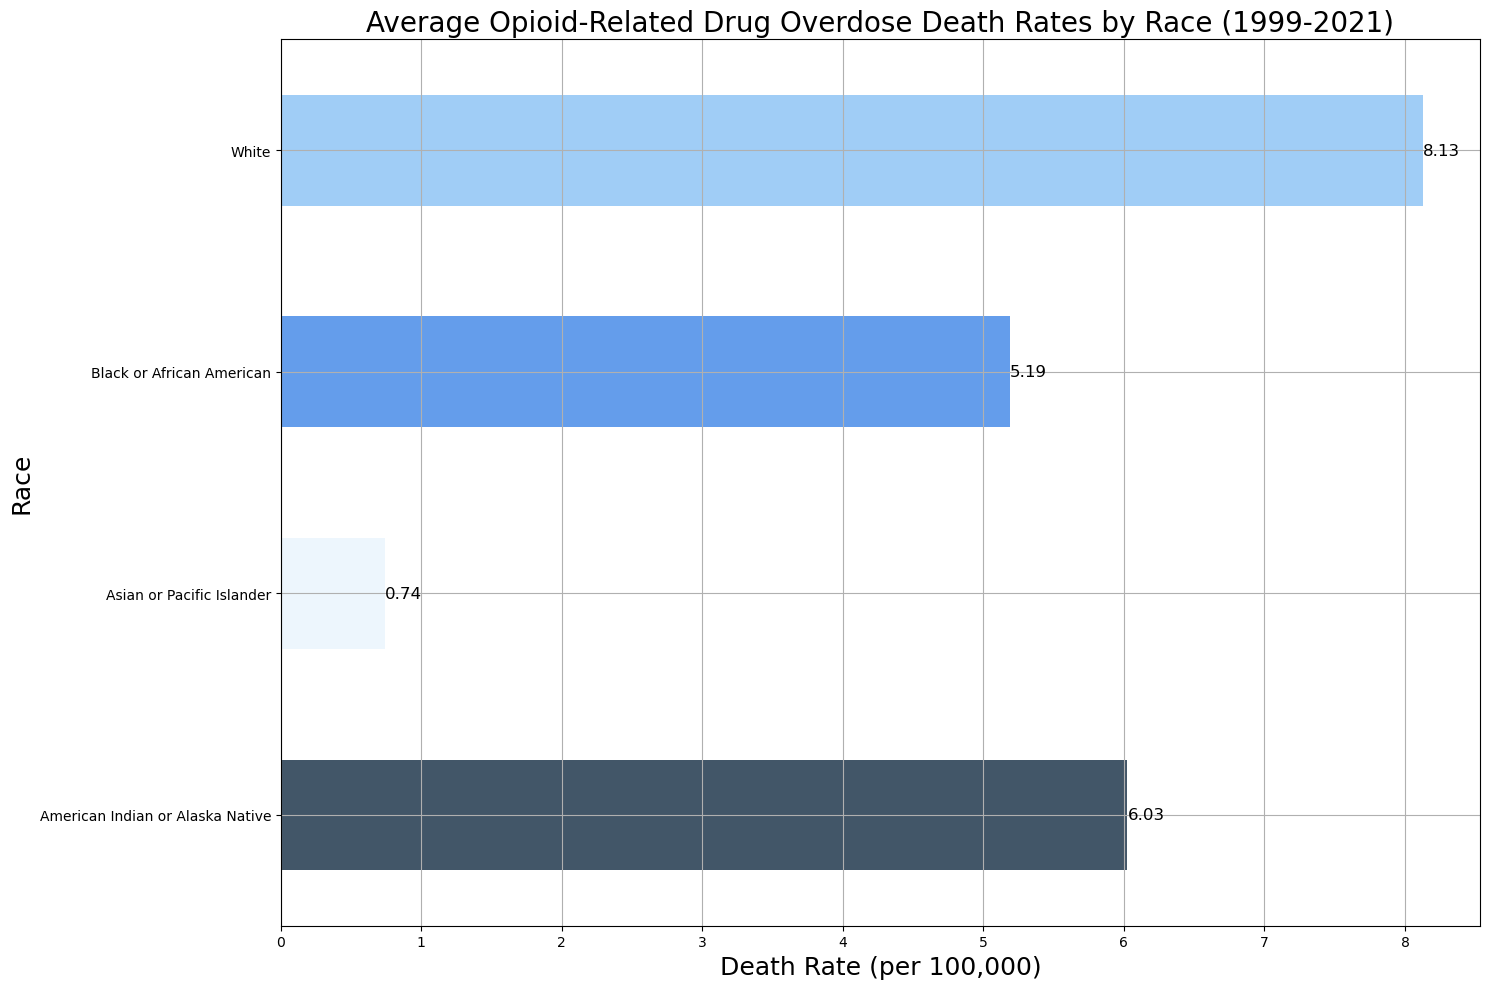

In [24]:
# create a bar chart to show average opioid deaths by race for easy comparison 

# Separate the data for males and females
male_data = pivot_df2[[col for col in pivot_df2.columns if 'Male' in col]].copy()
female_data = pivot_df2[[col for col in pivot_df2.columns if 'Female' in col]].copy()

# Rename the columns to reflect the races without gender distinction
male_data.columns = [col.split(': ')[-1] for col in male_data.columns]
female_data.columns = [col.split(': ')[-1] for col in female_data.columns]

# Combine the male and female datasets
combined_data = pd.concat([male_data, female_data])

# Aggregate the data to calculate the average death rate for each race
average_data = combined_data.mean()

# Define a consistent color map for the races utilizing previous color codes from other chart 
color_map = {
    'American Indian or Alaska Native': '#2d4358',
    'Asian or Pacific Islander': '#ebf5fd',
    'Black or African American': '#5393e9',
    'Hispanic or Latino': '#74b3f1',
    'White': '#96c8f5',
    'Other': '#b3dbf0'
}

# Plotting the average death rates as a horizontal bar chart
plt.figure(figsize=(15, 10))  
ax = average_data.plot(kind='barh', color=[color_map.get(race, '#333333') for race in average_data.index], alpha=0.9)

# Add numeric labels to each bar for easy comparison 
for index, value in enumerate(average_data):
    ax.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12)

# Set titles and labels
plt.title('Average Opioid-Related Drug Overdose Death Rates by Race (1999-2021)', fontsize=20)
plt.xlabel('Death Rate (per 100,000)', fontsize=18)
plt.ylabel('Race', fontsize=18)
plt.grid(True)
plt.tight_layout()

# Save the plot as an image
plt.savefig('average_opioid_death_rates_by_race.png')
plt.show()
